# Problem definition
 
Every 6 seconds in 2019, we lost one entire football field of primary rainforest (Weisse & Goldman, 2020). The destruction of forests is one of the most pressing and irreversibly impactful issues of our time. It is intrinsically tied to climate change, home and habitat loss, and income inequality (FAO & UNEP, 2020). Deforestation releases nearly 10% of all human greenhouse gas emissions (Rainforest Alliance, 2018). Yet, we have already cut almost half of all trees available and doubled our rate of deforestation in the past 15 years (Nunez, 2019). Despite all of our technological advancements, trees remain one of the most effective solutions for removing CO2, a main culprit of climate change, from the atmosphere (Bastin, 2020). We need to protect the world’s largest terrestrial carbon sink now (WWF, n.d.).

Uncovering the land uses replacing forests can help us tackle this issue. With knowledge of the direct drivers of deforestation, decision-makers and stakeholders can develop and implement more effective policies and take more targeted action to curb forest loss (Irvin et al., 2020). 

# Solution specification

Manual tracking and on-the-ground reporting of direct drivers, whilst accurate, is not scalable given the widespreadness of deforestation. Analysis of satellite imagery through machine learning (ML) models can therefore help us monitor forest loss at scale. ML techniques like decision-tree modeling, however, are limited for this application; they depend on high-resolution data that is not widely available and do not make full use of the information (e.g. multiple land uses) present in satellite images (Irvin et al., 2020). Convolutional neural networks, a semantic segmentation approach, and transfer learning can fill in that gap. 

Framed under this deep learning approach, the problem we are seeking to solve now takes the shape of a classification task. The developed model will classify each image containing forest loss as one of the four land use categories: "plantation," "smallholder agriculture," "grassland/shrubland," and "other." Through this, we can identify the direct driver of deforestation in a region (Irvin et al., 2020).

__Convolutional neural network__

Convolutional neural networks, often referred to as CNNs or ConvNets, are instances of deep learning and, of course, neural networks. This machine learning algorithm is often used for classifying images (Saha, 2018). As a neural network, it is modeled loosely on our own neural system (specifically, the visual cortex) and the concept of activation threshold. By assigning importance to aspects of the images (for example, pixels) through weights and biases that are learned, CNNs can differentiate images (Saha, 2018). 

The CNN used here has a Feature Pyramid Network and is build up from an EfficientNet-B2 backbone (Irvin et al., 2020).

__Semantic segmentation__

Semantic segmentation is a technique that seperates regions in images according to the object class they belong to (Papers With Code, n.d.). To do so, each pixel in the image is labelled according to the class or category it is predicted to represent. This is called pixel-level dense prediction (Papers With Code, n.d.; Jordan, 2018). 

Semantic segmentation is achieved through neural networks. State-of-the-art semantic segmentation is achieved through EfficientNets (see below for explanation) (Huynh & Boutry, 2020). 

For the problem at hand, pixel-level prediction allows us to differentiate with more granularility between the different and multiple land uses of deforested land (Irvin et al., 2020). When predicting, we use the mean of all the per-pixel predictions in an image to classify the image and forest loss region it represents as one type of deforestation driver (Irvin et al., 2020). This differs from the canonical approach of multi-class classification where the model does not seek to label every pixel in the image. 

__Transfer learning__

By building on top of a transferrable (i.e. similar) model trained on other data (transfer learning), we save time and resources, which is useful when we lack (labelled) data and also environ- mentally friendly (Kostadinov, 2019).

Here, we conduct transfer learning by using the pre-trained model EfficientNet-B2 as a backbone.

__EfficientNet-B2__

EfficientNets are image classification models that achieve state-of-the art accuracy (as shown on ImageNet data). They are smaller and faster than the best existing CNNs (Tan & Le, 2020). EfficientNets are built up through an invertedd bottleneck MBConv, AutoML, and compound scaling (Tan & Le, 2020).  

EfficientNet-B2 (an instance of EfficientNets) is used in this model as a backbone, meaning that it serves as a feature extracting network, allowing us to choose a layer for feature extraction (TenserFlow, 2020; StackOverflow, 2020). 

__Feature Pyramid Network__

The architecture of the final model is a Feature Pyramid Network. As the name implies, this CNN has a pyramid representation, and it uses a top-down pathway with lateral connections to detect objects at different scales (Lin et al., 2017). 

---

This solution draws inspiration from Stanford ML Group's _ForestNet: Classifying Drivers of Deforestation in Indonesia using Deep Learning on Satellite Imagery_. In this November 2020 paper, Irvin et al. (2020) present results from a state-of-the-art model they developed by comparing random forests (RF) and convulational neural networks (CNN) models, and by "[investigating] the effect of (a) using scene data augmentation (SDA) where [they] randomly sample from the scenes and composite images during training to capture changes in landscape over time, (b) pre-training (PT) the model on a large land cover dataset in Indonesia that [they] curated, and (c) using multi-modal fusion with a variety of auxiliary predictors [(Aux)]." For this project, I develop a CNN model and try replicating Irvin et al.'s (2020) results using their same dataset. The addition of SDA, PT, and Aux, whilst they do also contribute (though less significantly) to improving accuracy and f-scores, are beyond the scope of the current project. The largest improvements in their model performance metrics occur between the RF and CNN models and hence my focus on the latter.

# Testing and analysis

To effectively test the models, the data was randomly split into a training, validation, and testing set. To best replicate Irvin et al.'s (2020) results, I used the same segregation of the data into these three sets (downloadable from Stanford ML Group's website). 

The model performance is evaluated through the F1 score. The F1 score is a weighted harmonic mean of both the precision and recall metrics (Shung, 2018). Recall identifies, in our scenario, the fraction of images of the direct driver class that were actually identified ( = true positives / (true positives + false negatives)). Precision identifies, in our scenario, the fraction of images classified as a particular direct driver class that was actually correctly identified ( = true positives / (true positives + false positives)). This mix of the two scores provides an effective measure of the models because we wish to both:
(1) make sure we find all the instances of the specific direct driver causing deforestation;
(2) correctly attribute deforestation to the right direct driver. Optimizing on both of these measures through a weighted metric allows decision-makers, based on the model, to then define appropriate measures that include all forest loss areas driven by the direct driver category and differentiate between the specifically problematic direct drivers.

# Results

ForestNet, the CNN model with the same architecture and backbone as specified above but with the addition of scene data augmentation, pre-training, and multi-modal fusion with auxiliary variables, achieved "high classification performance" on the test set across the four direct driver classes (Irvin et al., 2020). Whilst the authors do not include specifications on each driver category for the pure CNN model, the overall (all categories combined) accuracy and F1 scores for all the models are described.  
            
The F1 scores obtained in Irvin et al's (2020) CNN model is of 0.75 on the validation set and of 0.70 on the test set. In the model developed here, the F1 score is _ on the validation set and _ on the test set. The difference in scores might be due to a difference in (a) reporting calculations, (b) the loss function specifications, and/or (c) hyperparameter tuning. Irvin et al. (2020) report using the average of 10 runs for validation results, and the best validation run for test results. What this means in practice is unclear and might differ from the implementation here. The current version of Irvin et al.'s (2020) paper does not go into enough detail on what their "linear combination of segmentation and classification losses" looks like, to effectively replicate it. Access to their code in the future will be useful to understand better what parameters, including the loss function, they used to build their model.


In our model, the highest F1 score is obtained for the plantation driver category, like for Irvin et al.'s (2020) more complex model. This might be attributable to the fact that this driver class compromises about 40% of both the training data and the test data. The smallholder agriculture category holds the second highest F1 score, followed by the "other" category. Last is the grassland/shrubland category. This might be due to confusion with smallholder agriculture: the precision rate of smallholder agriculture is prioritized at the expense of the precision rate of the grassland/shrubland (see Table 2 in Irvin et al. (2020) for evidence of this). This tradeoff can make sense because it is valuable to identify all cases of agriculture fueling deforestation over logging and empty land that can possibly regrow naturally. If, however, we instead instead wanted to prioritize accurately recognizing _all_ the cases of shrubland or minimize false positives (or, generally, obtain a better F1 score) for the grassland/shrubland deforestation driver, we might want to adjust the training procedure. Specifically, when evaluating the model on the validation set after each epoch, we may wish to save the checkpoint with the highest F1 score for the specific category of concern (in this case, grassland/shrubland), instead of for the mean across all four categories.
          

# References

Bastin, Jean-François. (2020, October). What if there were 1 trillion more trees? TED-Ed. https://ed.ted.com/lessons/can-we-build-a-perfect-forest-jean-francois-bastin  

FAO & UNEP. (2020). The State of the World’s Forests 2020: Forests, Biodiversity and People. www.fao.org/3/ca8642en/ca8642en.pdf  

Huynh, L. D., & Boutry, N. (n.d.). A U-Net++ With Pre-Trained EfficientNet Backbone for Segmentation of Diseases and Artifacts in Endoscopy Images and Videos. Retrieved from http://ceur-ws.org/Vol-2595/endoCV2020_paper_id_11.pdf  

Irvin, J., Sheng, H., Ramachandran, N., Johnson-Yu, S., Zhou, S., Story, K., ... & Ng, A. Y. (2020). ForestNet: Classifying Drivers of Deforestation in Indonesia using Deep Learning on Satellite Imagery. arXiv preprint arXiv:2011.05479.  

Irvin, J., Sheng, H., Ramachandran, N., Johnson-Yu, S., Zhou, S., Story, K., ... & Ng, A. Y. (2020). ForestNet: Classifying Drivers of Deforestation in Indonesia using Deep Learning on Satellite Imagery [Slides]. Climate Change AI. Retrieved from https://www.climatechange.ai/papers/neurips2020/22.html  

Jordan, J. (2018). An overiew of semantic image segmentation. Retrieved from https://www.jeremyjordan.me/semantic-segmentation/

Kingma, D. P., & Ba, J. (2014). Adam: A method for stochastic optimization. arXiv preprint arXiv:1412.6980.

Kostadinov, S. (2019). What is Deep Transfer Learning and Why Is It Becoming So Popular? Retrieved from https://towardsdatascience.com/what-is-deep-transfer-learning-and-why-is-it-becoming-so-popular-91acdcc2717a

Lin, T-Y., Dollár, P. Girshick, R., He, K. Hariharan, B., & Belongie, S. (2017). Feature Pyramid Networks for Object Detection. Proceedings of the IEEE conference on computer vision and pattern recognition. Retrieved from https://openaccess.thecvf.com/content_cvpr_2017/papers/Lin_Feature_Pyramid_Networks_CVPR_2017_paper.pdf

Nunez, C. (2019, February 7). Deforestation explained. National Geographic. www.nationalgeographic.com/environment/global-warming/deforestation/

Papers With Code. (n.d.). Computer Vision: Semantic Segmentation. Retrieved from https://paperswithcode.com/task/semantic-segmentation

Saha, S. (2018). A Comprehensive Guide to Convolutional Neural Networks - the ELI5 way. Towards Data Science. Retrieved from https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

Shung, P. (2018). Accuracy, Precision, Recall or F1? Towards Data Science. Retrieved from https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

StackOverflow. (2020). What means backbone in a neural network? Retrieved from https://stackoverflow.com/questions/59868132/what-means-backbone-in-a-neural-network

Tan, M, & Le, Q. V. (2019). Efficientnet: Rethinking model scaling for convolutional neural networks. arXiv preprint arXiv:1905.11946.

Tenserflow. (2020). efficientnet/b2/classification. Retrieved from https://tfhub.dev/tensorflow/efficientnet/b2/classification/1

Weisse, M., & Goldman, E. D. (2020, June 2). We Lost a Football Pitch of Primary Rainforest Every 6 Seconds in 2019. World Resources Institute (WRI). www.wri.org/blog/2020/06/global-tree-cover-loss-data-2019

WWF. (n.d.). Forest and Climate. wwf.panda.org/our_work/our_focus/forests_practice/forest_climate/

**#sourcequality**: To understand Irvin et al.'s (2020) paper given its limited explanations of the model and to then be able to effectively explain, justify, and succintly summarize the model and its techniques here, I had to conduct extensive research. I relied on a variety of sources and expertise knowledge (e.g. scientific papers). As the implementation was very challenging with the little implementation they described, appropriate sources also included going to our TAs office hours for multiple hours to talk throught the model and help overcome bugs. I'm grateful to Mohamed for his guidance.

# Appendices

## Appendix A: Data

The data used is publicly available. It can be downloaded on Stanford ML Group's website: https://stanfordmlgroup.github.io/projects/forestnet/; or directly from here: http://download.cs.stanford.edu/deep/ForestNetDataset.zip

"The dataset consists of 2,756 satellite images of forest loss events with driver annotations. Global Forest Change (GFC) published maps were used to obtain forest loss events, each represented as a polygon and associated with a year indicating when the forest loss event occurred. An expert interpreter annotated each event with the direct driver of deforestation using high resolution satellite imagery from Google Earth. The driver annotations were grouped into Plantation, Smallholder Agriculture, Grassland/shrubland, and Other.

We captured each forest loss region with Landsat 8 satellite imagery acquired within five years of the event’s occurrence using a custom cloud-minimizing search procedure. Using this procedure, we obtained exactly one composite image for each example and additional images for any individual cloud-filtered scenes. Imagery was processed and downloaded using the Descartes Labs platform" (Irvin et al., 2020).

## Appendix B: Irvin et al.'s code

I reached out to Jeremy Irvin and Hao Sheng (the main authors) to inquire about the code behind their ForestNet paper, as I could not find it not publicly accessible. Their reply is as follows:

<img src="./ForestNet email.png">

As their code is not yet published and publicly available, I worked on replicating their model given what they divulged in their Methods section (not very detailed) and publicly available repos, including the one mentioned above. Whilst the code in the repos provide some guidance, the repos do not implement the model Irvin et al. (2020) describe and so a significant amount of extrapolation and building up on my own was required.

## Appendix C: Source code

In [1]:
import os
import imageio
# import cv2
import matplotlib.pyplot as plt
import pandas as pd

### Loading of the data

In [2]:
# Data downloaded from http://download.cs.stanford.edu/deep/ForestNetDataset.zip 

df_train = pd.read_csv('./ForestNetDataset/test.csv')
df_val = pd.read_csv('./ForestNetDataset/val.csv')
df_test = pd.read_csv('./ForestNetDataset/train.csv')

In [3]:
# Check out the data

In [4]:
# Peak at the training data
df_train.head()

,label,merged_label,latitude,longitude,year,example_path
0,Small-scale agriculture,Smallholder agriculture,1.446543,100.799778,2007,examples/1.446543071130837_100.79977801432716
1,Grassland shrubland,Grassland shrubland,-1.209593,122.040547,2016,examples/-1.2095927346679962_122.0405465386496
2,Timber plantation,Plantation,-0.205606,102.938756,2014,examples/-0.20560633109394327_102.93875617664571
3,Other,Other,-1.730708,113.711455,2012,examples/-1.7307080624887758_113.71145483864248
4,Oil palm plantation,Plantation,1.429489,100.823635,2010,examples/1.429488982681029_100.82363463176235


In [5]:
df_train.tail()

,label,merged_label,latitude,longitude,year,example_path
663,Secondary forest,Other,-4.546995,138.550939,2015,examples/-4.546995345493858_138.55093919394707
664,Secondary forest,Other,-6.849402,139.293801,2016,examples/-6.849401821379706_139.29380101814974
665,Timber plantation,Plantation,-1.247071,116.438285,2012,examples/-1.2470707925742197_116.43828534266872
666,Small-scale agriculture,Smallholder agriculture,-1.117901,120.538561,2004,examples/-1.117901069624485_120.53856116642237
667,Secondary forest,Other,-0.214673,103.510579,2014,examples/-0.2146726494964884_103.51057948511793


In [6]:
# Define a function to get all composite images from specific directory
def get_images_data(df, directory='./ForestNetDataset/'):
    # Get all labels
    y = df['merged_label']

    # Get all images
    x = []
    for path in df_test['example_path']:
        path = f'{directory}{path}/images/visible/composite.png'
        im = imageio.imread(path)
        x.append(im)
    return (x, y)

In [7]:
# Fetch train data
x_train, y_train = get_images_data(df_train)
# Fetch validation data
x_val, y_val = get_images_data(df_val)
# Fetch test data
x_test, y_test = get_images_data(df_test)

In [8]:
data = {
    'train': get_images_data(df_train), 
    'val': get_images_data(df_val), 
    'test': get_images_data(df_test)
}

In [9]:
# Checkout a data point example: image + label
y_train[50]

'Other'

In [10]:
x_val[50].shape

(332, 332, 3)

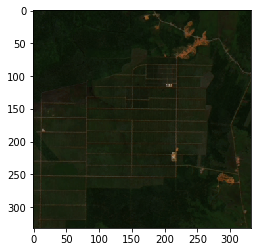

In [11]:
plt.imshow(x_train[50])

In [12]:
# Check columns are consistent
df_val.columns

Index(['label', 'merged_label', 'latitude', 'longitude', 'year',
       'example_path'],
      dtype='object')

In [13]:
df_test.columns

Index(['label', 'merged_label', 'latitude', 'longitude', 'year',
       'example_path'],
      dtype='object')

In [14]:
# Check out sizes of dataset and split distribution
# replicating Irvin et al.'s distribution: ~24% train, 17% validation, 59% test
num_train = len(df_train)
num_val = len(df_val)
num_test = len(df_test)

print("\nTotal data points in datasets:")
print("train:", len(df_train))
print("validation", len(df_val))
print("test:", len(df_test))

ttl = num_train + num_val + num_test
print("\nPercentage split of total dataset across datasets:")
print("train:", round((num_train/ttl)*100, 1), "%")
print("validation:", round((num_val/ttl)*100, 1), "%")
print("test:", round((num_test/ttl)*100, 1), "%")


Total data points in datasets:
train: 668
validation 473
test: 1616

Percentage split of total dataset across datasets:
train: 24.2 %
validation: 17.2 %
test: 58.6 %


### Building of the model

In [ ]:
# Code built up using PyTorch library package from https://github.com/qubvel/segmentation_models.pytorch 
# Code adapted from https://github.com/qubvel/segmentation_models.pytorch/blob/master/segmentation_models_pytorch/utils/metrics.py

In [ ]:
! pip install segmentation_models_pytorch

In [ ]:

import segmentation_models_pytorch as smp # segmentation_models_pytorch recommended by authors of the paper when I reached out
# import tenserflow as tf
import torch

In [ ]:
# Define the model parameters
ENCODER = 'efficientnet-b2' # Use EfficientNet-B2
# ENCODER_WEIGHTS = 'imagenet'
ENCODER_WEIGHTS = None # random initialization of weights
CLASSES = 4 # 4 direct drivers
ACTIVATION = None # None for logits

# Create segmentation model with pretrained encoder
model = smp.FPN(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    # in_channels=3   # model input channels (1 for grayscale images, 3 for RGB, etc.)
    classes=CLASSES, 
    activation=ACTIVATION,
)

In [ ]:
print(model)

In [ ]:
# Prepare data the same way as during weights pretraining 
# because all models have pretrained encoders/weights
# preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)
# not always necessary - see smp libary documentation - removing for parsimony purposes (debugging)

In [ ]:
# Define data loaders for feeding batches of data in neural network
train_loader = DataLoader(x_train, batch_size=8, shuffle=True, num_workers=12)
valid_loader = DataLoader(x_val, batch_size=1, shuffle=False, num_workers=4)

In [ ]:
# Define the loss function
# Dice Loss = F1 score
loss = smp.utils.losses.DiceLoss()

# Define performance metric: f-score 
# See note in report above
metrics = [
    smp.utils.metrics.FScore(), 
    # smp.utils.metrics.Accuracy(), 
    # smp.utils.metrics.Precision(), 
    # smp.utils.metrics.Recall(), 
]

# Define the optimizer
# See note in report above
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0001),
])

__A note on Adam optimization:__ Adam  is a stochastic gradient descent optimization algorithm and useful for problems with demanding amounts of data as it is computationally efficient (Kingma & Ba, 2014). This fits our image-based dataset well.

In [ ]:
# Classify from per-pixel scores/logits
# Compute the per-pixel logit within the forest loss region/polygon
# Compute mean of the per-pixel scores/logits in the polygon for each class
# Assign highest mean score (amongst classes) to image

### Train the model

In [ ]:
# Create epoch runners 
# a simple loop iterating over dataloader's samples
# For the training set, using optimizer
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    verbose=True,
)

# For the validation set, without optimizing
valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    verbose=True,
)

In [ ]:
# Train model for specified number of epochs
# During training, the model is evaluated on the validation set after each epoch 
# and the checkpoint with the highest F1 score averaged over the four-driver categories is saved

epoch_num = 30 

max_score = 0

for i in range(0, epoch_num):
    # Evaluate model on the validation set after each log
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # Save checkpoint with the highest F1 score
    # averaged over the four-driver categories
    if max_score < valid_logs['f1_score']: 
        max_score = valid_logs['f1_score']
        torch.save(model, './best_model.pth')
        print('Model saved!')

### Testing of the model

In [ ]:
# Load best saved checkpoint
best_model = torch.load('./best_model.pth')

In [ ]:
test_loader = DataLoader(x_test)

In [ ]:
# Evaluate model on test set
test_epoch = smp.utils.train.ValidEpoch(
    model=best_model,
    loss=loss,
    metrics=metrics,
)

logs = test_epoch.run(test_loader)
# The output includes the f1 score

## Appendix D: Extra code

In [ ]:
# Download data for testing
import numpy as np
np.save('train_data_small', x_train[:100])

__Transfer learning using a EfficientNet-B2 backbone__

In [ ]:
# Use EfficientNet-B2 for transfer learning 
# https://tfhub.dev/tensorflow/efficientnet/b2/classification/1
# https://www.tensorflow.org/hub/common_signatures/images#classification

m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b2/classification/1")
])
m.build([None, expect_img_size, expect_img_size, 3])  # Batch input shape
# ? What does the None stand for? Images? Why is it None?

# m.predict(...)

### Performance evaluation

Validation set accuracy: 0.80

Validation set F1 score: 0.75



Test set accuracy: 0.78

Test set F1 score: 0.70